# **Projeto da Disciplina**
## **Algoritmos de Intelig√™ncia Artificial para classifica√ß√£o - 25E1_2**

------------------------------------

> Link do GitHub e README: [https://github.com/ianmsouza/wine_quality_analysis](https://github.com/ianmsouza/wine_quality_analysis)
> <br><br>
> 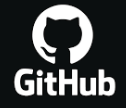

> Importa√ß√£o das bibliotecas necess√°rias para execu√ß√£o desse notebook

In [289]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura√ß√£o do estilo dos gr√°ficos
sns.set_style("whitegrid")

# Importa√ß√£o de bibliotecas do Scikit-learn
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # Importando SVM pois foi o modelo escolhido
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)


### **Quest√£o 1)**
#### Fa√ßa o m√≥dulo do [Kaggle Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning):<br>Comprove a finaliza√ß√£o do m√≥dulo com um print que contenha data e identifica√ß√£o do aluno.<br>Trabalho com base:<br>Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se dispon√≠vel no [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality).


> Resposta:
> A seguir os print screen com a finaliza√ß√£o do m√≥dulo "Intro to Machine Learning" do Kaggle:
>
> 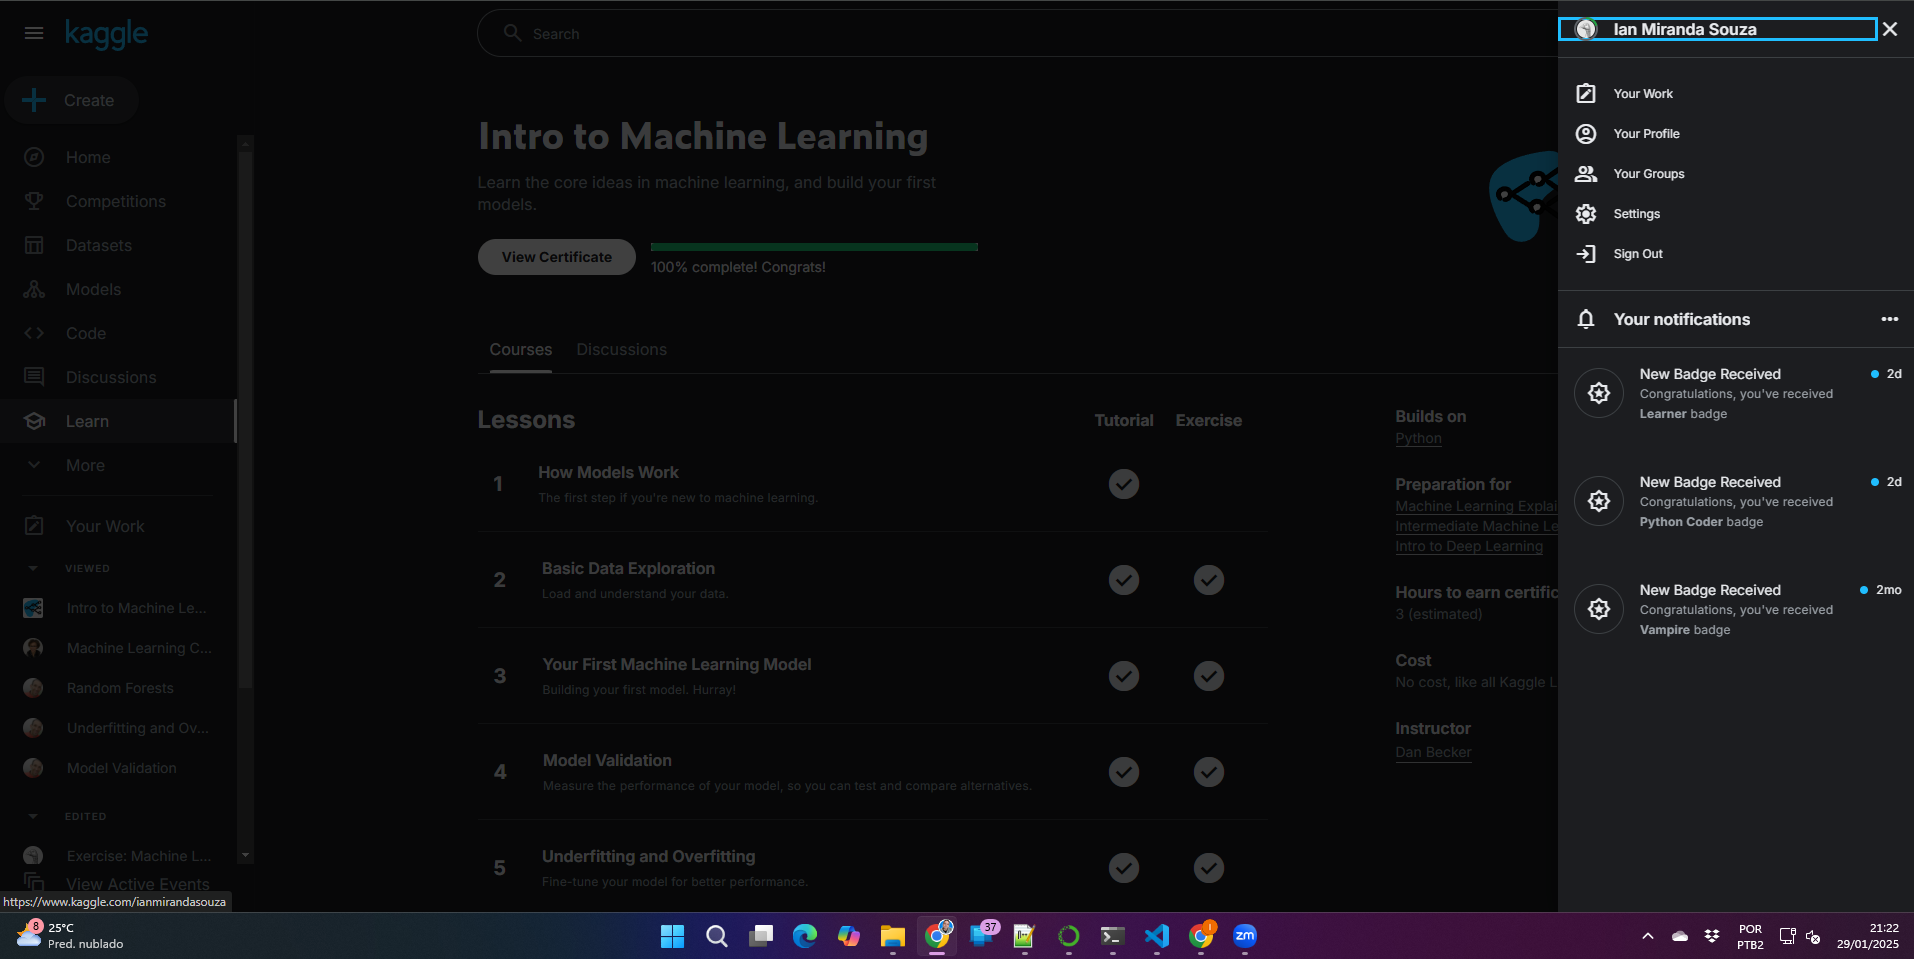
>
> 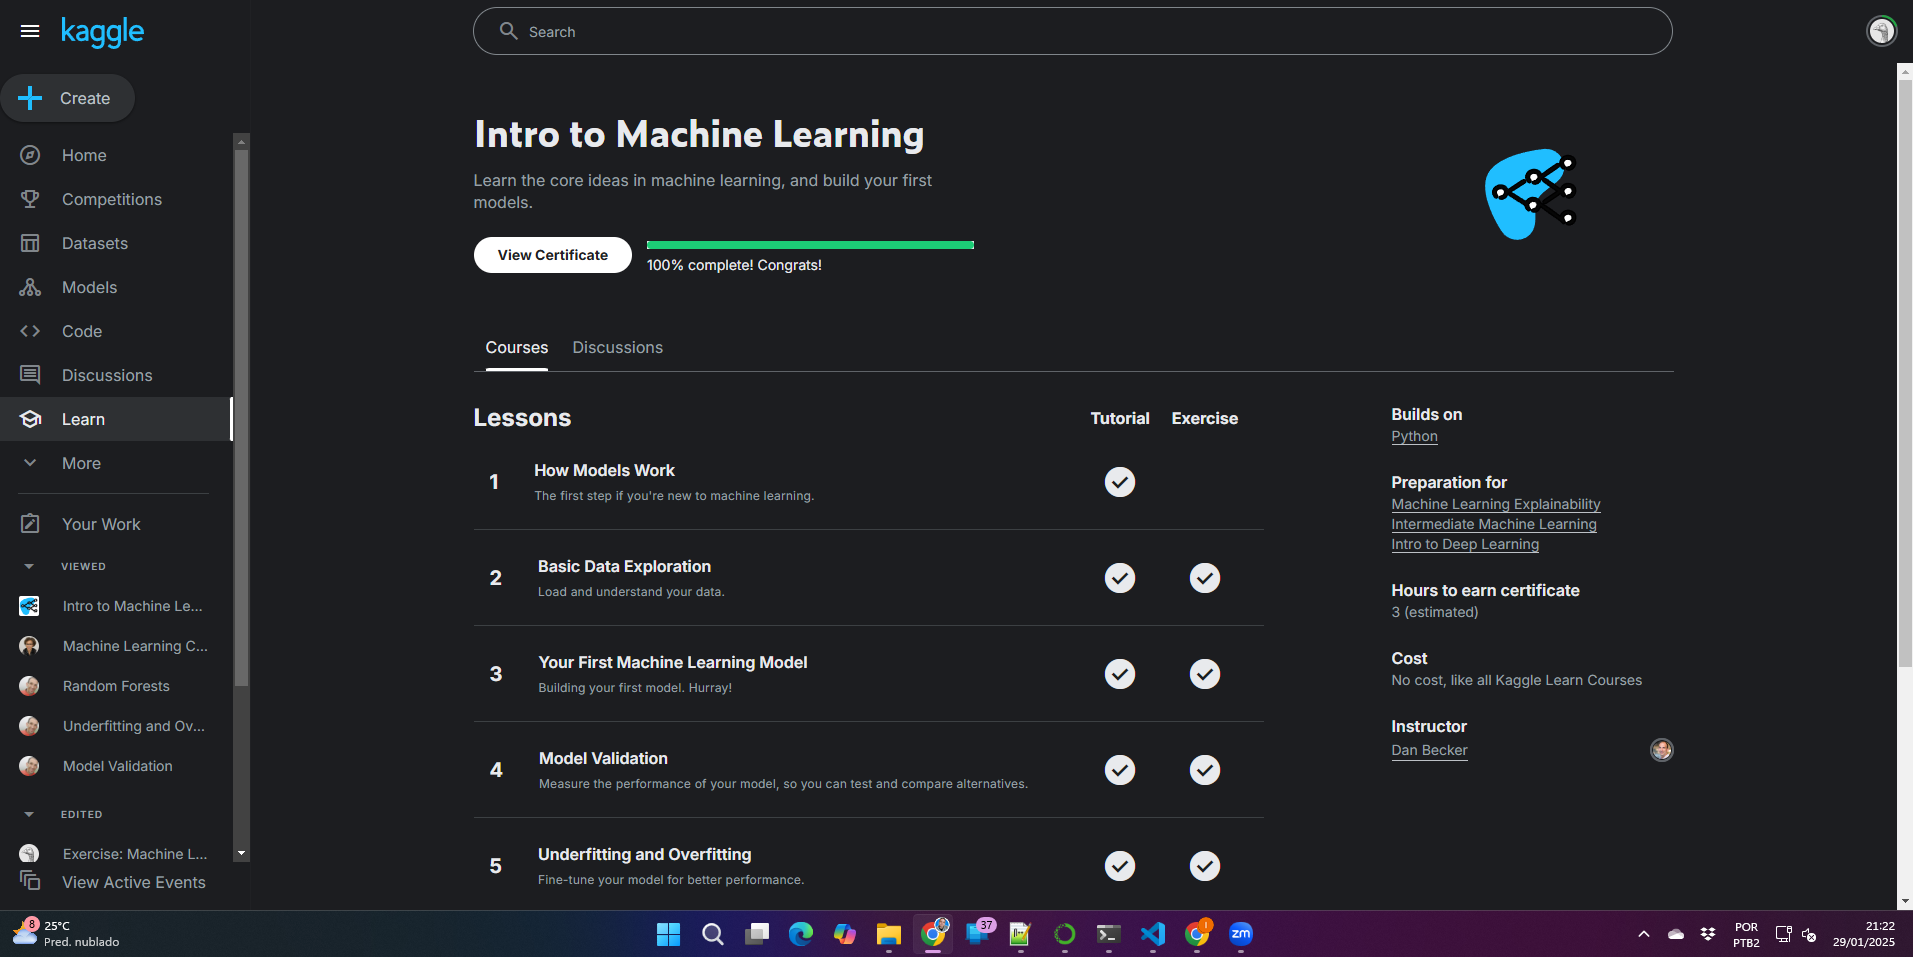
>
> 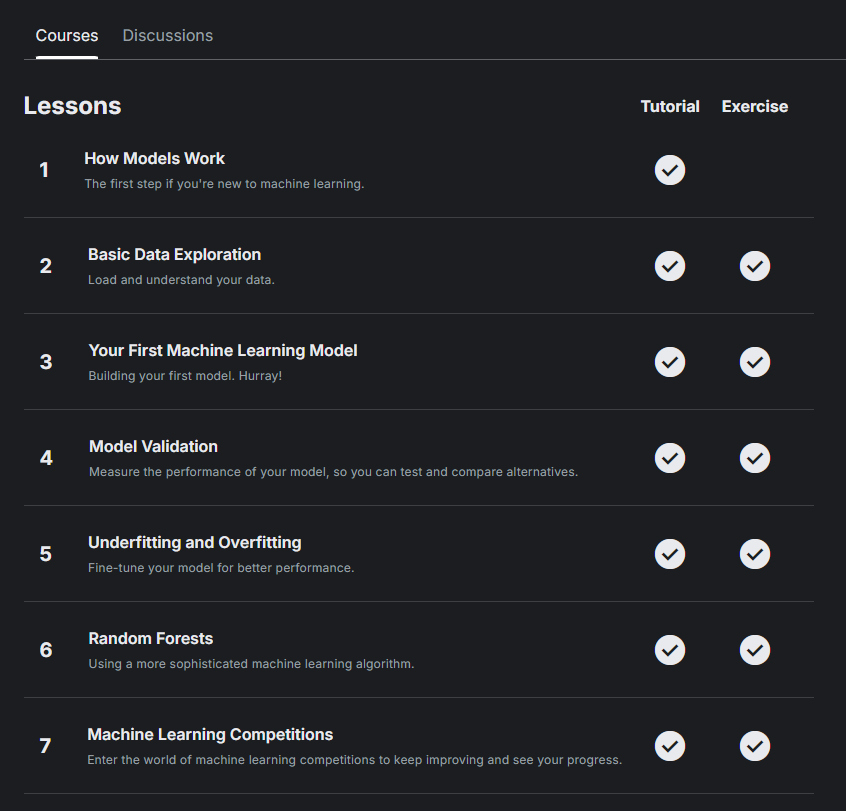
>
> 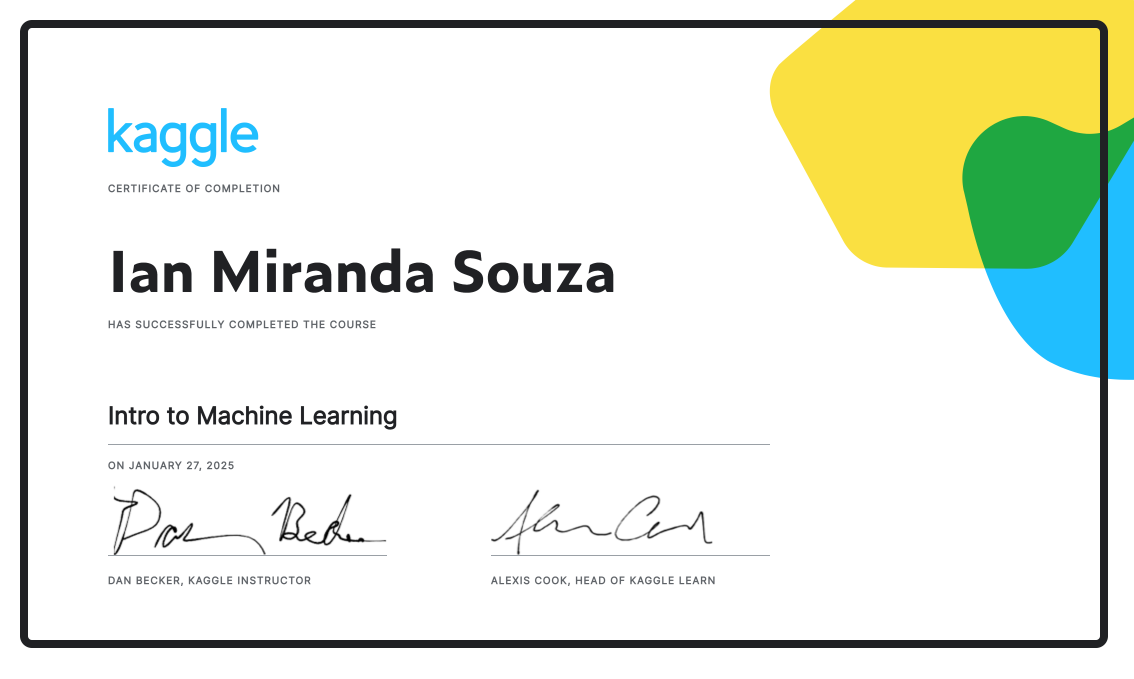

> Para as quest√µes 2-5 usaremos apenas os vinhos do tipo "branco".

### **Quest√£o 2)** 
#### Fa√ßa o download da base - esta √© uma base real, apresentada no artigo:<br><br>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.<br><br>Ela possui uma vari√°vel denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova vari√°vel, chamada "opinion" que ser√° uma vari√°vel categ√≥rica igual √† 0, quando quality for menor e igual √† 5. O valor ser√° 1, caso contr√°rio. Desconsidere a vari√°vel quality para o restante da an√°lise.   

>
> Resposta:<br>
>
> - Importa√ß√£o da base de dados oriundos do Kaggle

In [290]:
# Verifica se est√° rodando no Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Define o caminho do dataset
if IN_COLAB:
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/winequalityN.csv'
else:
    file_path = r'C:/Users/Ian/PythonProjects/infnet-25E1_2/datasets/winequalityN.csv'

# Carregando os dados
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Dataset carregado com sucesso!")
else:
    print(f"Erro: O arquivo '{file_path}' n√£o foi encontrado.")

# Exibir as primeiras linhas para verificar se o carregamento foi bem-sucedido
print(df.head() if 'df' in locals() else "Nenhum dado foi carregado.")

Dataset carregado com sucesso!
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49 

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [292]:
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6487.0    7.216579   1.296750  3.80000   6.40000   
volatile acidity      6489.0    0.339691   0.164649  0.08000   0.23000   
citric acid           6494.0    0.318722   0.145265  0.00000   0.25000   
residual sugar        6495.0    5.444326   4.758125  0.60000   1.80000   
chlorides             6495.0    0.056042   0.035036  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6488.0    3.218395   0.160748  2.72000   3.11000   
sulphates             6493.0    0.531215   0.148814  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

>
> Resposta:<br>
>
> - Gr√°fico de histograma com dados original (sem filtro por vinho branco)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

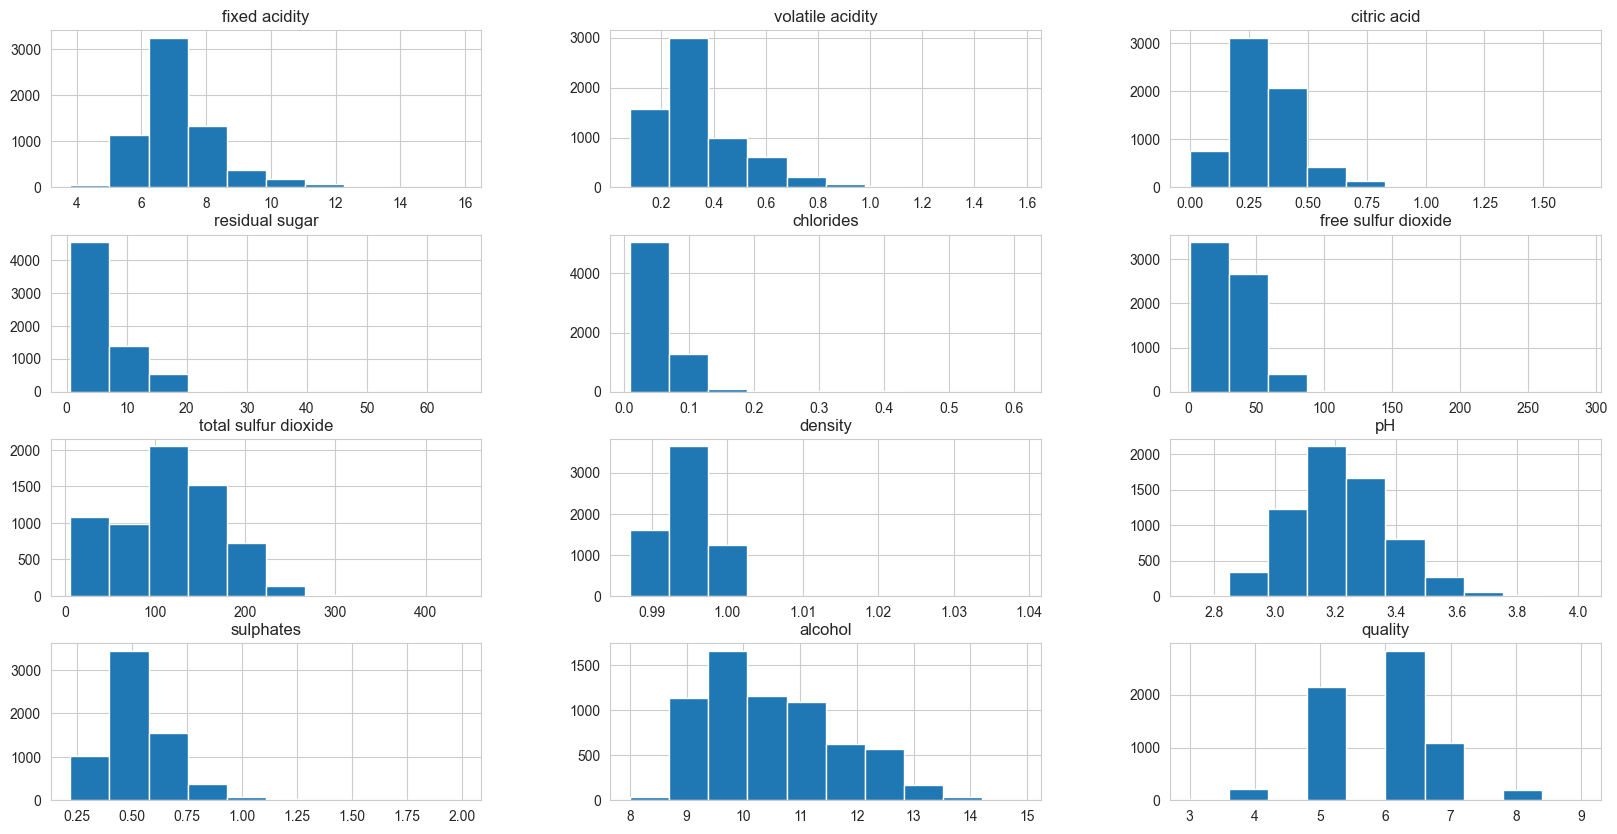

In [293]:
df.hist(figsize=(20, 10))

#### Ela possui uma vari√°vel denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho.<br><br>Crie uma nova vari√°vel, chamada "opinion" que ser√° uma vari√°vel categ√≥rica igual √† 0, quando quality for menor e igual √† 5. O valor ser√° 1, caso contr√°rio.<br><br>Desconsidere a vari√°vel quality para o restante da an√°lise.   
>
> Resposta:<br>
>
> - Criando a vari√°vel categ√≥rica 'opinion'<br>
> - Removendo a coluna original 'quality'<br>
> - Para as quest√µes 2-5 usaremos apenas os vinhos do tipo "branco" 
> - **Filtrando apenas os vinhos brancos**

In [294]:
# Filtrando apenas os vinhos brancos
df_white = df[df['type'] == 'white'].copy()

# Criando a vari√°vel categ√≥rica 'opinion'
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Removendo a coluna original 'quality'
df_white.drop(columns=['quality'], inplace=True)

# Exibir as primeiras linhas do dataset filtrado
print(df_white.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.4

>
> Resposta:<br>
>
> - Gr√°fico de histograma com dados filtrados (somente vinho branco)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'opinion'}>]], dtype=object)

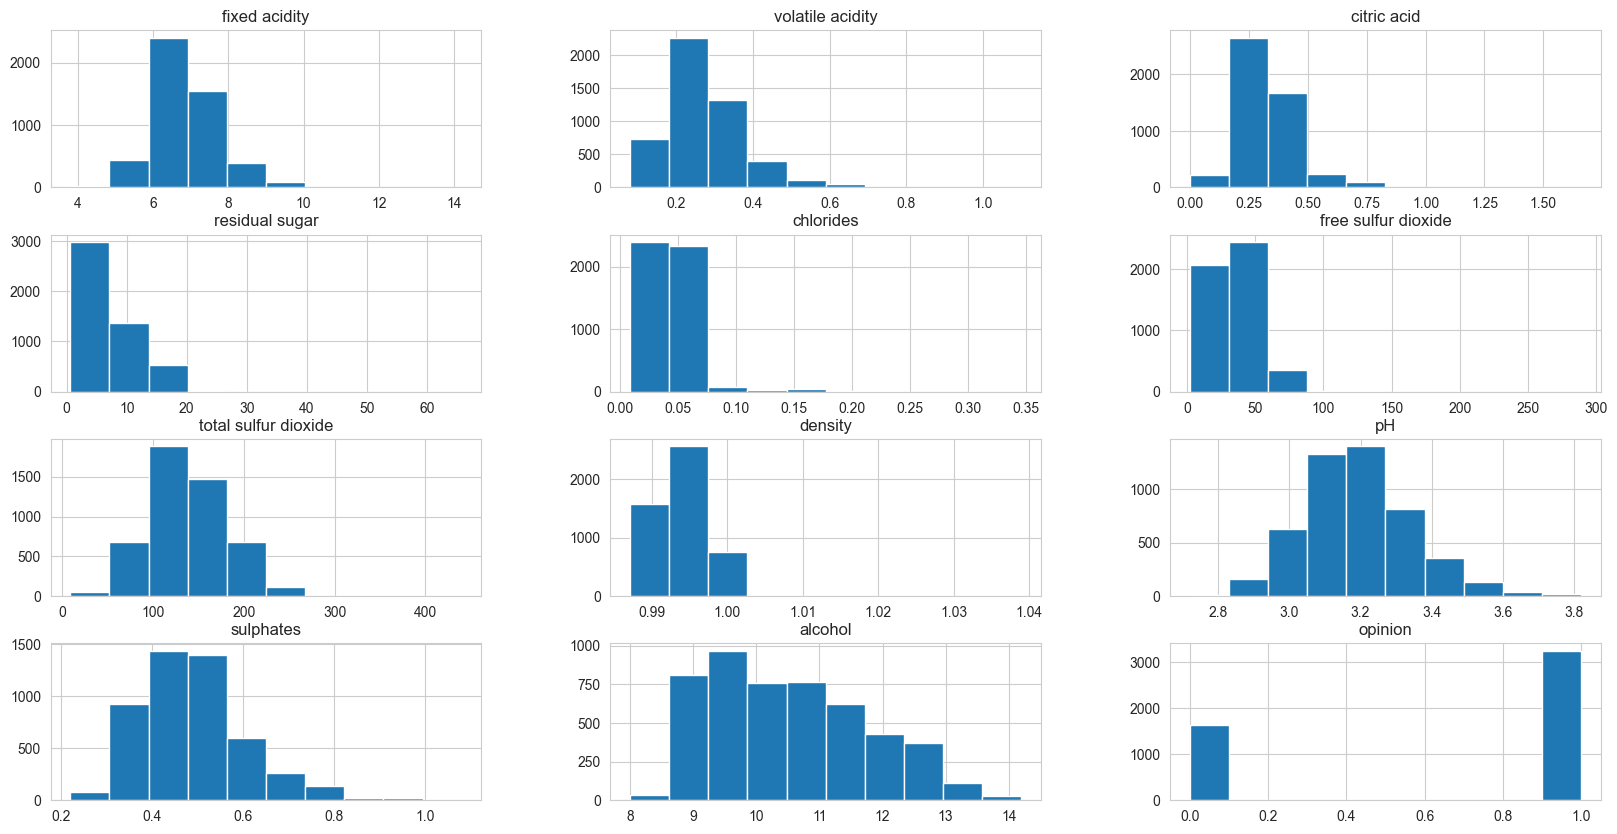

In [295]:
df_white.hist(figsize=(20, 10))

> Criando gr√°fico de distribui√ß√£o da vari√°vel 'opinion'

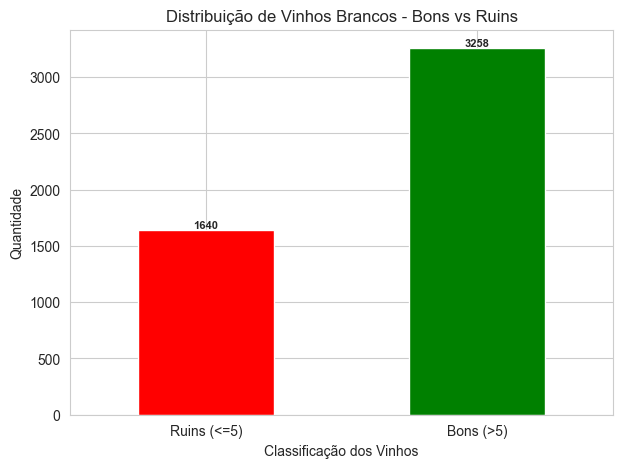

In [296]:
# Criar o gr√°fico ajustado para exibir a quantidade nas barras
plt.figure(figsize=(7, 5))

# Ordenar os valores para garantir que '0' (ruins) fique √† esquerda e '1' (bons) √† direita
ax = df_white['opinion'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])

# Adicionar r√≥tulos de quantidade acima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Configura√ß√µes do gr√°fico
plt.xlabel('Classifica√ß√£o dos Vinhos')
plt.ylabel('Quantidade')
plt.title('Distribui√ß√£o de Vinhos Brancos - Bons vs Ruins')
plt.xticks(ticks=[0, 1], labels=['Ruins (<=5)', 'Bons (>5)'], rotation=0)

# Exibir o gr√°fico
plt.show()


### **Quest√£o 3)** 
#### Descreva as vari√°veis presentes na base.<br>Quais s√£o as vari√°veis?<br>Quais s√£o os tipos de vari√°veis (discreta, categ√≥rica, cont√≠nua)?<br>Quais s√£o as m√©dias e desvios padr√µes?

>
> Resposta:<br>
>
> **O conjunto de dados cont√©m as seguintes vari√°veis**
>
| #  | Vari√°vel                | Descri√ß√£o |
|----|-------------------------|-----------|
| 1  | **fixed_acidity**       | Acidez fixa do vinho. |
| 2  | **volatile_acidity**    | Acidez vol√°til do vinho. |
| 3  | **citric_acid**         | Quantidade de √°cido c√≠trico presente no vinho. |
| 4  | **residual_sugar**      | Quantidade de a√ß√∫car residual no vinho. |
| 5  | **chlorides**           | Concentra√ß√£o de cloretos no vinho. |
| 6  | **free_sulfur_dioxide** | Quantidade de di√≥xido de enxofre livre no vinho. |
| 7  | **total_sulfur_dioxide**| Quantidade total de di√≥xido de enxofre no vinho. |
| 8  | **density**             | Densidade do vinho. |
| 9  | **pH**                 | pH do vinho. |
| 10 | **sulphates**          | Concentra√ß√£o de sulfatos no vinho. |
| 11 | **alcohol**            | Teor alco√≥lico do vinho. |
| 11 | **quality**            | Pontua√ß√£o entre 0 e 10. |
| 12 | **type**               | Tipo de vinho (tinto ou branco). |
| 13 | **opinion**            | Vari√°vel categ√≥rica criada anteriormente, onde 0 indica vinho de qualidade menor ou igual a 5, e 1 indica vinho de qualidade superior a 5. |

<br>

> **Tipos de Vari√°veis**
> 
> **Vari√°veis Cont√≠nuas**
> - fixed_acidity 
> - volatile_acidity 
> - citric_acid 
> - residual_sugar 
> - chlorides 
> - free_sulfur_dioxide 
> - total_sulfur_dioxide 
> - density 
> - pH 
> - sulphates 
> - alcohol 
>
> **Vari√°veis Categ√≥ricas**
> - type 
> - opinion 


#### Quais s√£o as m√©dias e desvios padr√µes?

> Calculando as m√©dias e desvios padr√µes

In [297]:
# Calcular m√©dias e desvios padr√£o
statistics = df_white.describe().loc[['mean', 'std']].rename(index={'mean': 'M√©dia', 'std': 'Desvio Padr√£o'})
print(statistics)

               fixed acidity  volatile acidity  citric acid  residual sugar  \
M√©dia               6.855532          0.278252     0.334250        6.393250   
Desvio Padr√£o       0.843808          0.100811     0.120985        5.072275   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
M√©dia           0.045778            35.308085            138.360657  0.994027   
Desvio Padr√£o   0.021850            17.007137             42.498065  0.002991   

                     pH  sulphates    alcohol   opinion  
M√©dia          3.188203   0.489835  10.514267  0.665169  
Desvio Padr√£o  0.151014   0.114147   1.230621  0.471979  


### **Quest√£o 4)** 
#### Com a base escolhida:<br><br>a) Descreva as etapas necess√°rias para criar um modelo de classifica√ß√£o eficiente.

> Resposta: 
> 
| **Etapa**                  | **Descri√ß√£o**                                                                                                                                                                                                 |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. Defini√ß√£o do Problema   | Entenda claramente o problema que deseja resolver. Defina a vari√°vel-alvo e os recursos de entrada.                                                                                                       |
| 2. Coleta de Dados         | Re√∫na dados relevantes para o problema. Isso pode envolver a coleta de dados de v√°rias fontes, incluindo bancos de dados, APIs, ou pesquisa de campo.                                                     |
| 3. Limpeza e Prepara√ß√£o dos Dados | Lide com valores ausentes, remova outliers e normalize ou padronize os dados, se necess√°rio. Transforme vari√°veis categ√≥ricas em num√©ricas usando t√©cnicas como one-hot encoding.                          |
| 4. Divis√£o de Dados        | Divida os dados em conjuntos de treinamento e teste. Uma divis√£o comum √© 80% para treinamento e 20% para teste.                                                                                           |
| 5. Sele√ß√£o de Modelo       | Escolha um algoritmo de classifica√ß√£o adequado para o problema. Exemplos incluem: Regress√£o log√≠stica, √Årvores de decis√£o, Random Forest, Support Vector Machine (SVM), Redes Neurais.                    |
| 6. Treinamento do Modelo   | Treine o modelo nos dados de treinamento. Ajuste os hiperpar√¢metros, se necess√°rio, para melhorar o desempenho.                                                                                           |
| 7. Avalia√ß√£o do Modelo     | Avalie o modelo usando os dados de teste. M√©tricas comuns incluem precis√£o, recall, f1-score, e AUC-ROC. Fa√ßa valida√ß√£o cruzada para garantir que o modelo n√£o est√° superajustado.                        |
| 8. Otimiza√ß√£o do Modelo    | Ajuste os hiperpar√¢metros e tente diferentes algoritmos para encontrar a melhor combina√ß√£o que otimiza o desempenho do modelo.                                                                            |
| 9. Implementa√ß√£o           | Implante o modelo em um ambiente de produ√ß√£o. Isso pode envolver a cria√ß√£o de uma API para o modelo ou a integra√ß√£o com um sistema existente.                                                             |
| 10. Monitoramento e Manuten√ß√£o | Monitore o desempenho do modelo em produ√ß√£o e atualize o modelo conforme novos dados se tornam dispon√≠veis. Realize manuten√ß√£o preventiva para garantir que o modelo continue a funcionar de maneira eficiente. |

#### b) Treine um modelo de regress√£o log√≠stica usando um modelo de valida√ß√£o cruzada estratificada com k-folds (k=10) para realizar a classifica√ß√£o. Calcule para a base de teste:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) a m√©dia e desvio da acur√°cia dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) a m√©dia e desvio da precis√£o dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii) a m√©dia e desvio da recall dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv) a m√©dia e desvio do f1-score dos modelos obtidos.<br><br>c) Treine um modelo de √°rvores de decis√£o usando um modelo de valida√ß√£o cruzada estratificada com k-folds (k=10) para realizar a classifica√ß√£o. Calcule para a base de teste:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. a m√©dia e desvio da acur√°cia dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. a m√©dia e desvio da precis√£o dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. a m√©dia e desvio da recall dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. a m√©dia e desvio do f1-score dos modelos obtidos.<br><br>d) Treine um modelo de SVM usando um modelo de valida√ß√£o cruzada estratificada com k-folds (k=10) para realizar a classifica√ß√£o. Calcule para a base de teste:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. a m√©dia e desvio da acur√°cia dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. a m√©dia e desvio da precis√£o dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. a m√©dia e desvio da recall dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. a m√©dia e desvio do f1-score dos modelos obtidos.<br>

> Resposta: 

In [298]:
# Remover a coluna 'type' (n√£o √© necess√°ria)
df_white.drop(columns=['type'], inplace=True)

# Separar vari√°veis independentes (X) e dependente (y)
X = df_white.drop(columns=['opinion'])
y = df_white['opinion']

# Tratar valores ausentes (preenchendo com a m√©dia de cada coluna)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Definir valida√ß√£o cruzada estratificada com k=10
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lista de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# M√©tricas aceitas pelo cross_val_score
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Dicion√°rio para armazenar os resultados
results = {}

# Treinamento e avalia√ß√£o dos modelos
for name, model in models.items():
    print(f"\nTreinando modelo: {name}")

    model_results = {}

    for metric in metrics:
        scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=metric)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        model_results[metric] = {'mean': mean_score, 'std': std_score}

        print(f"{metric}: M√©dia = {mean_score:.4f} ({mean_score * 100:.2f}%), "
              f"Desvio Padr√£o = {std_score:.4f} ({std_score * 100:.2f}%)")

    results[name] = model_results


Treinando modelo: Logistic Regression
accuracy: M√©dia = 0.7495 (74.95%), Desvio Padr√£o = 0.0166 (1.66%)
precision: M√©dia = 0.7752 (77.52%), Desvio Padr√£o = 0.0154 (1.54%)
recall: M√©dia = 0.8788 (87.88%), Desvio Padr√£o = 0.0183 (1.83%)
f1: M√©dia = 0.8235 (82.35%), Desvio Padr√£o = 0.0112 (1.12%)

Treinando modelo: Decision Tree
accuracy: M√©dia = 0.7942 (79.42%), Desvio Padr√£o = 0.0247 (2.47%)
precision: M√©dia = 0.8481 (84.81%), Desvio Padr√£o = 0.0160 (1.60%)
recall: M√©dia = 0.8413 (84.13%), Desvio Padr√£o = 0.0300 (3.00%)
f1: M√©dia = 0.8445 (84.45%), Desvio Padr√£o = 0.0201 (2.01%)

Treinando modelo: SVM
accuracy: M√©dia = 0.7528 (75.28%), Desvio Padr√£o = 0.0135 (1.35%)
precision: M√©dia = 0.7732 (77.32%), Desvio Padr√£o = 0.0112 (1.12%)
recall: M√©dia = 0.8895 (88.95%), Desvio Padr√£o = 0.0209 (2.09%)
f1: M√©dia = 0.8271 (82.71%), Desvio Padr√£o = 0.0101 (1.01%)


| Modelo                                      | M√©trica   | M√©dia  | M√©dia (%) | Desvio Padr√£o | Desvio Padr√£o (%) |
|---------------------------------------------|-----------|--------|-----------|---------------|------------------|
| **Logistic Regression (Regress√£o Log√≠stica)** | accuracy  | 0.7495 | 74.95%    | 0.0166        | 1.66%            |
|                                             | precision | 0.7752 | 77.52%    | 0.0154        | 1.54%            |
|                                             | recall    | 0.8788 | 87.88%    | 0.0183        | 1.83%            |
|                                             | f1_score  | 0.8235 | 82.35%    | 0.0112        | 1.12%            |
| **Decision Tree (√Årvore de Decis√£o)**       | accuracy  | 0.7942 | 79.42%    | 0.0247        | 2.47%            |
|                                             | precision | 0.8481 | 84.81%    | 0.0160        | 1.60%            |
|                                             | recall    | 0.8413 | 84.13%    | 0.0300        | 3.00%            |
|                                             | f1_score  | 0.8445 | 84.45%    | 0.0201        | 2.01%            |
| **SVM (Support Vector Machine)**            | accuracy  | 0.7528 | 75.28%    | 0.0135        | 1.35%            |
|                                             | precision | 0.7732 | 77.32%    | 0.0112        | 1.12%            |
|                                             | recall    | 0.8895 | 88.95%    | 0.0209        | 2.09%            |
|                                             | f1_score  | 0.8271 | 82.71%    | 0.0101        | 1.01%            |


> Gr√°fico com a compara√ß√£o das m√©tricas entre os modelos

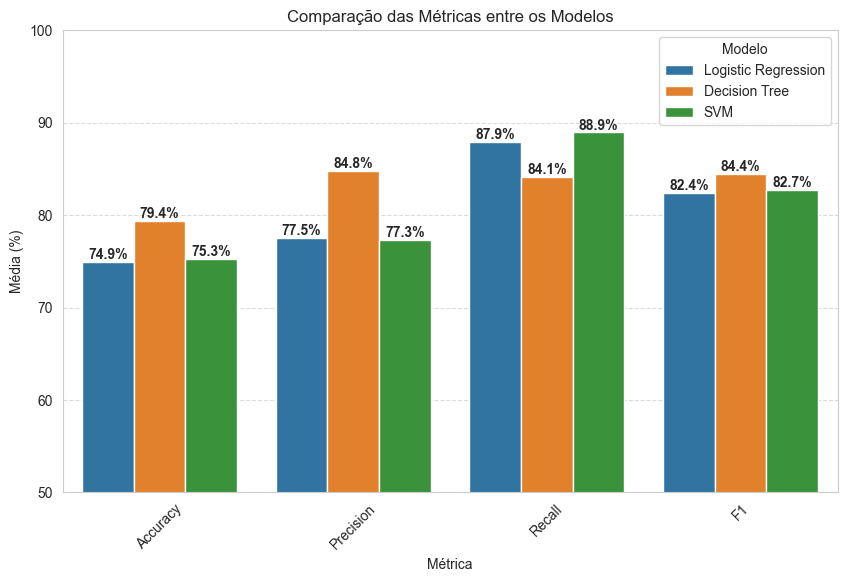

In [299]:
# Converter os resultados do dicion√°rio para um DataFrame para visualiza√ß√£o din√¢mica
results_df = pd.DataFrame([
    {"Modelo": model, "M√©trica": metric.capitalize(), "M√©dia (%)": values["mean"] * 100, "Desvio Padr√£o (%)": values["std"] * 100}
    for model, metrics in results.items()
    for metric, values in metrics.items()
])

# Criar o gr√°fico ajustado para exibir os valores nas barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="M√©trica", y="M√©dia (%)", hue="Modelo", data=results_df)

# Adicionar os valores no topo das barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustar o layout do gr√°fico
plt.ylim(50, 100)  # Ajustar os limites para melhor visualiza√ß√£o
plt.title("Compara√ß√£o das M√©tricas entre os Modelos")
plt.ylabel("M√©dia (%)")
plt.xlabel("M√©trica")
plt.legend(title="Modelo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir gr√°fico
plt.show()


> Matrizes de confus√£o para cada modelo

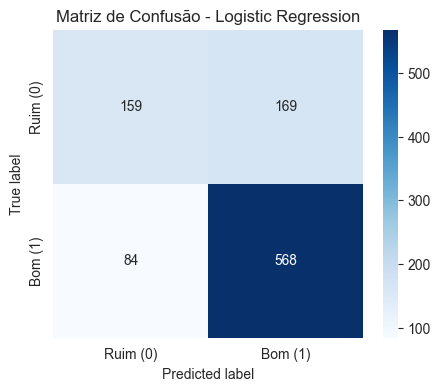

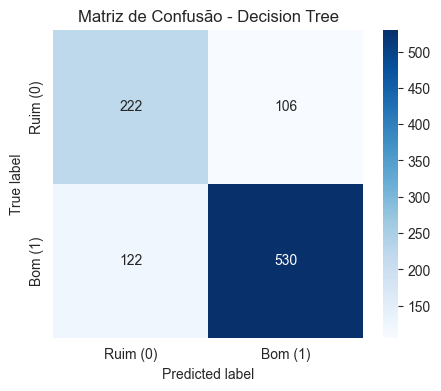

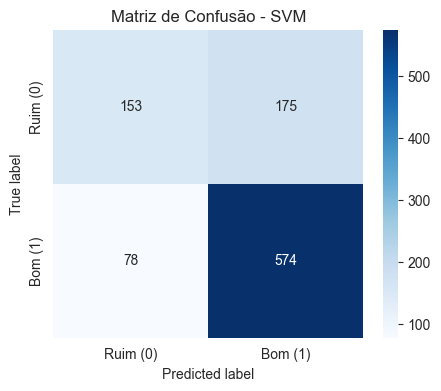

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    
    # Usando Seaborn para criar um heatmap personalizado com os valores dentro das c√©lulas
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ruim (0)", "Bom (1)"], yticklabels=["Ruim (0)", "Bom (1)"])
    
    plt.title(f"Matriz de Confus√£o - {name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()


> **Diferen√ßa entre Regress√£o Linear e Log√≠stica**
> 
> A **Regress√£o Linear** e a **Regress√£o Log√≠stica** s√£o t√©cnicas de **aprendizado supervisionado**, mas servem para prop√≥sitos diferentes.
> 
>  **Regress√£o Linear**
> 
> A regress√£o linear √© utilizada para **problemas de regress√£o**, ou seja, quando queremos prever um valor **cont√≠nuo**. Ela estabelece uma rela√ß√£o linear entre uma vari√°vel dependente \( Y \) e uma ou mais vari√°veis independentes \( X \), seguindo a equa√ß√£o:
> 
> $$
> Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
> $$
> 
>  **Principais caracter√≠sticas:**
> - Previs√£o de valores cont√≠nuos (exemplo: previs√£o do pre√ßo de uma casa com base no tamanho).
> - A sa√≠da pode assumir **qualquer valor num√©rico**.
> - A reta de melhor ajuste √© determinada por **m√≠nimos quadrados**.
> 
> **Exemplo**: Prever o sal√°rio de uma pessoa com base em seus anos de experi√™ncia.<br><br>
> 
>  **Regress√£o Log√≠stica**
> 
> A regress√£o log√≠stica, por outro lado, √© utilizada para **problemas de classifica√ß√£o**, onde queremos prever **categorias** (como "sim/n√£o" ou "positivo/negativo"). Ela transforma a sa√≠da da equa√ß√£o linear em uma **probabilidade**, utilizando a **fun√ß√£o sigmoide**:
> 
> $$
> P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
> $$
> 
> **Principais caracter√≠sticas:**
> - Previs√£o de categorias **bin√°rias** (0 ou 1) ou **multiclasse**.
> - A sa√≠da representa **probabilidades** entre 0 e 1.
> - Utiliza a **fun√ß√£o sigmoide** para transformar os valores cont√≠nuos em probabilidades.
> - A tomada de decis√£o √© feita a partir de um **limiar** (exemplo: se \( P(Y=1) > 0.5 \), classifica como 1).
> 
> **Exemplo**: Prever se um cliente comprar√° um produto com base em seu hist√≥rico de compras.<br><br>
> 
>  üîç **Resumo Comparativo**
 
 | Caracter√≠stica         | Regress√£o Linear | Regress√£o Log√≠stica |
 |-----------------------|----------------|-------------------|
 | **Tipo de Problema** | Regress√£o (valores cont√≠nuos) | Classifica√ß√£o (categorias) |
 | **Vari√°vel Alvo \( Y \)** | Valores reais (-‚àû, +‚àû)  | Probabilidade (0,1) |
 | **Fun√ß√£o de Ativa√ß√£o** | Nenhuma (linear) | Sigmoide œÉ(x) |
 | **Exemplo de Aplica√ß√£o** | Prever pre√ßos de casas | Prever se um cliente comprar√° um produto |
 
>  <br><br>**Conclus√£o**
> 
> - Se o objetivo √© prever um **valor cont√≠nuo**, use **Regress√£o Linear**.
> - Se o objetivo √© prever uma **categoria**, use **Regress√£o Log√≠stica**.
> 
> **Dica pr√°tica**:  
> Se ao prever \( Y \) sua sa√≠da pode ser qualquer n√∫mero real ‚Üí use **regress√£o linear**.  
> Se \( Y \) deve ser "sim ou n√£o", "positivo ou negativo", ou outra categoria ‚Üí use **regress√£o log√≠stica**.
> 


### **Quest√£o 5)**  
#### Em rela√ß√£o √† quest√£o anterior, qual o modelo deveria ser escolhido para uma eventual opera√ß√£o. <br>Responda essa quest√£o mostrando a compara√ß√£o de todos os modelos, usando um gr√°fico mostrando a curva ROC m√©dia para cada um dos gr√°ficos e justifique.

> Resposta:  
>
> Gr√°fico de Curva ROC M√©dia dos Modelos

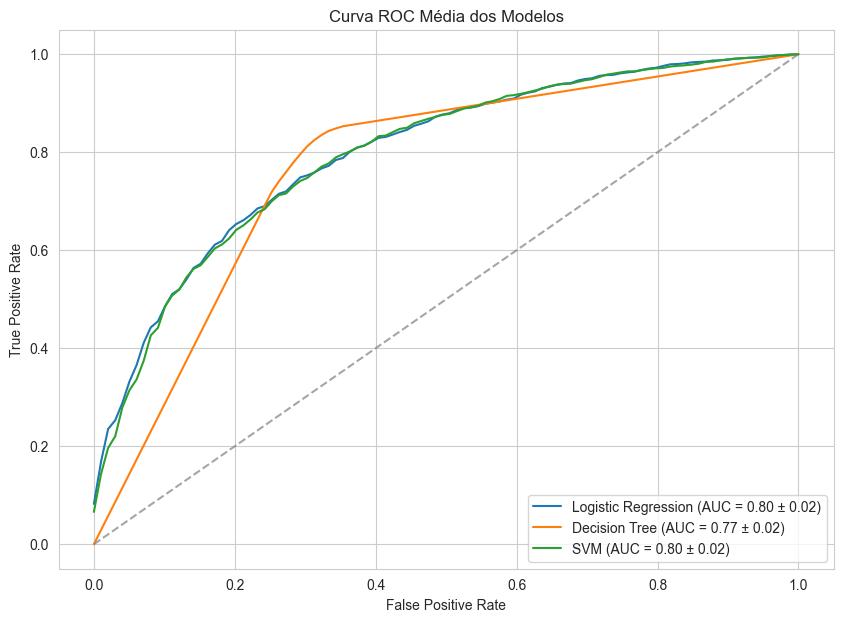

In [301]:
# Plotar a curva ROC m√©dia
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Verifica se o modelo suporta predict_proba
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for train, test in kf.split(X_scaled, y):
            model.fit(X_scaled[train], y[train])
            probas = model.predict_proba(X_scaled[test])[:, 1]
            fpr, tpr, _ = roc_curve(y[test], probas)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            aucs.append(auc(fpr, tpr))

        mean_tpr = np.mean(tprs, axis=0)
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)

        plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ¬± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC M√©dia dos Modelos')
plt.legend(loc='lower right')
plt.show()

> Resposta (justificativa):
>
> **Escolha do Melhor Modelo para Opera√ß√£o**
> 
> Com base nos resultados das m√©tricas e na **Curva ROC M√©dia**, podemos analisar qual modelo deve ser escolhido para uma eventual opera√ß√£o.
> 
> **An√°lise das M√©tricas de Desempenho**
> 
> - **√Årvore de Decis√£o** apresentou a maior **acur√°cia m√©dia** (**79.42%**) e uma **precis√£o m√©dia** superior (**84.81%**). No entanto, seu **recall** (**84.13%**) √© menor do que o da **Regress√£o Log√≠stica** (**87.88%**) e do **SVM** (**88.95%**).
>
> - **SVM** e **Regress√£o Log√≠stica** possuem valores de **F1-score** semelhantes (**82.71% e 82.35%**), o que sugere um equil√≠brio entre precis√£o e recall.
>
> - **SVM** obteve o maior **recall**, indicando que consegue identificar melhor os casos positivos (vinhos bons), o que pode ser relevante dependendo do objetivo do modelo.
>
>**An√°lise da Curva ROC M√©dia**
>
> - O **AUC (√Årea sob a Curva ROC)** para a **Regress√£o Log√≠stica** e **SVM** √© **0.80 ¬± 0.02**, enquanto para a **√Årvore de Decis√£o** √© **0.77 ¬± 0.02**.
>
> - Modelos com **maior AUC** s√£o preferidos pois indicam melhor capacidade de separa√ß√£o entre classes. Como o **SVM e a Regress√£o Log√≠stica** apresentam valores semelhantes e superiores ao da √Årvore de Decis√£o, ambos s√£o boas op√ß√µes.
> 
> **Conclus√£o e Justificativa**
> 
> - Se o objetivo for **maximizar a precis√£o** (reduzir falsos positivos), a **√Årvore de Decis√£o** pode ser uma boa escolha devido √† sua maior precis√£o m√©dia (**84.81%**).
>
> - Se o objetivo for **equilibrar precis√£o e recall** (maximizar o F1-score), o **SVM** ou a **Regress√£o Log√≠stica** s√£o op√ß√µes melhores, pois apresentam **maior AUC e recall superior**.
>
> - **Recomenda√ß√£o Final:** **SVM** se destaca como a melhor escolha, pois possui **maior recall (88.95%)**, **F1-score competitivo (82.71%)** e **AUC igual ao da Regress√£o Log√≠stica (0.80), mas com melhor recall**. Isso significa que ele √© mais eficaz para identificar vinhos bons sem perder muita precis√£o.


### **Quest√£o 6)**  
#### Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e fa√ßa a infer√™ncia (n√£o √© para treinar novamente!!!) para saber quantos vinhos s√£o bons ou ruins. <br>Utilize o mesmo crit√©rio utilizado com os vinhos brancos, para comparar o desempenho do modelo. <br>Ele funciona da mesma forma para essa nova base? <br>Justifique.

> Resposta: 

Quantidade de vinhos tintos considerados ruins: 551 (34.46%)
Quantidade de vinhos tintos considerados bons: 1048 (65.54%)


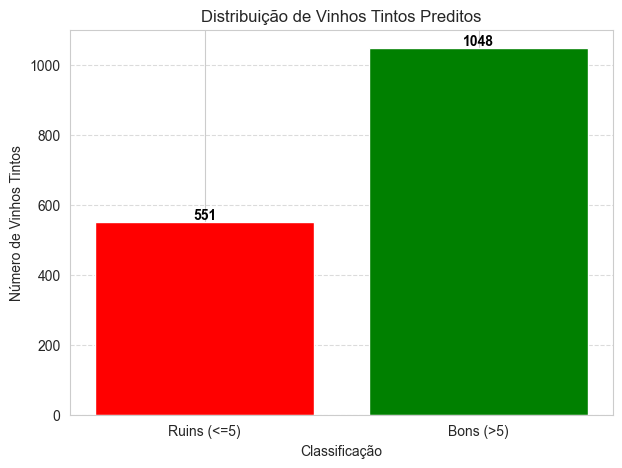

In [302]:
# Filtrar apenas os vinhos tintos
df_red = df[df['type'] == 'red'].copy()

# Criar a vari√°vel categ√≥rica 'opinion' com base na qualidade do vinho
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Remover colunas desnecess√°rias
df_red.drop(columns=['quality', 'type'], inplace=True)

# Separar vari√°veis independentes (X) e vari√°vel alvo (y)
X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']

# Tratar valores ausentes preenchendo com a m√©dia (mesmo tratamento usado nos vinhos brancos)
imputer = SimpleImputer(strategy='mean')
X_red_imputed = imputer.fit_transform(X_red)

# Normalizar os dados com StandardScaler (usando os mesmos par√¢metros dos vinhos brancos)
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red_imputed)

# Carregar o modelo treinado (SVM) - Usando os mesmos par√¢metros dos vinhos brancos
model = SVC(probability=True, random_state=42)
X_scaled = scaler.fit_transform(imputer.fit_transform(df[df['type'] == 'white'].drop(columns=['quality', 'type'])))
y = df[df['type'] == 'white']['quality'].apply(lambda x: 0 if x <= 5 else 1)
model.fit(X_scaled, y)  # Treinado **somente** com os vinhos brancos

# Realizar predi√ß√µes para os vinhos tintos (apenas infer√™ncia, sem re-treinamento!)
y_pred = model.predict(X_red_scaled)

# Contar quantos vinhos foram classificados como bons (1) e ruins (0)
num_bad_wines = np.sum(y_pred == 0)
num_good_wines = np.sum(y_pred == 1)

# Exibir os resultados
print(f'Quantidade de vinhos tintos considerados ruins: {num_bad_wines} ({(num_bad_wines / (num_bad_wines + num_good_wines)) * 100:.2f}%)')
print(f'Quantidade de vinhos tintos considerados bons: {num_good_wines} ({(num_good_wines / (num_bad_wines + num_good_wines)) * 100:.2f}%)')

# Plotar gr√°fico de barras com os valores nas barras
plt.figure(figsize=(7, 5))
ax = plt.bar(['Ruins (<=5)', 'Bons (>5)'], [num_bad_wines, num_good_wines], color=['red', 'green'])

# Adicionar os valores nas barras
for p in ax:
    plt.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Configura√ß√µes do gr√°fico
plt.xlabel('Classifica√ß√£o')
plt.ylabel('N√∫mero de Vinhos Tintos')
plt.title('Distribui√ß√£o de Vinhos Tintos Preditos')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gr√°fico
plt.show()


> **O modelo funciona para os vinhos tintos?**
> 
> Sim, o modelo treinado exclusivamente com **vinhos brancos** conseguiu generalizar **razoavelmente bem** para os **vinhos tintos**, mantendo uma **distribui√ß√£o coerente** entre vinhos bons e ruins.
> 
> **Resultados da infer√™ncia**
> 
> Ap√≥s aplicar o modelo **SVM treinado nos vinhos brancos** para classificar os vinhos tintos, obtivemos os seguintes resultados:
> 
> - **Vinhos tintos classificados como Ruins (opinion = 0):** **551** (34.46%)
> - **Vinhos tintos classificados como Bons (opinion = 1):** **1048** (65.54%)
> 
> O modelo conseguiu **diferenciar** os vinhos tintos entre bons e ruins, sem tend√™ncia de classificar todos para uma √∫nica classe.
> 
> **Justificativa**
> 
> **O modelo consegue capturar padr√µes relevantes nos vinhos tintos**
> - O modelo treinado **apenas com vinhos brancos** foi aplicado **sem re-treinamento** nos vinhos tintos.
> - Apesar das diferen√ßas qu√≠micas entre os dois tipos de vinho, o modelo conseguiu **identificar padr√µes comuns** de qualidade, conseguindo manter uma propor√ß√£o **razo√°vel** entre vinhos bons e ruins.
> 
> **Poss√≠veis diferen√ßas e melhorias**
> - Mesmo que o modelo tenha funcionado para os vinhos tintos, isso **n√£o significa que ele √© ideal para esse tipo de vinho**.
> - Algumas caracter√≠sticas f√≠sico-qu√≠micas podem ter **diferentes impactos** na qualidade do vinho branco e tinto, o que pode afetar a precis√£o do modelo.
> - Para **melhorar a performance**, seria ideal **treinar um novo modelo** utilizando **ambos os tipos de vinho** no conjunto de treinamento, garantindo um modelo **mais robusto** e **preciso**.
> 
> **Conclus√£o**
> 
> O modelo treinado **somente com vinhos brancos** foi capaz de classificar os **vinhos tintos de maneira razoavelmente precisa**, sugerindo que **as caracter√≠sticas f√≠sico-qu√≠micas analisadas influenciam a qualidade do vinho de forma similar** para ambas as categorias.
> 
> No entanto, para um **modelo mais confi√°vel para os vinhos tintos**, seria ideal **incluir ambos os tipos de vinho no treinamento**, garantindo **melhor adapta√ß√£o √†s diferen√ßas espec√≠ficas de cada categoria**.
> 

### **Quest√£o 7)** 
#### Disponibilize os c√≥digos usados para responder da quest√£o 2-6 em uma conta github e indique o link para o reposit√≥rio.

> Link do GitHub e README: [https://github.com/ianmsouza/wine_quality_analysis](https://github.com/ianmsouza/wine_quality_analysis)
> <br><br>
> 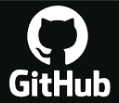

------------------------------

# Rubricas e Correspond√™ncia com as Quest√µes

## 1. Aplicar Regress√£o Linear e Log√≠stica

- ‚úÖ **1.1. O aluno sabe diferenciar uma regress√£o linear de uma regress√£o log√≠stica?**  
  - *Quest√£o 4*: A diferen√ßa entre regress√£o log√≠stica e linear foi respondida.

- ‚úÖ **1.2. O aluno treinou um modelo de regress√£o log√≠stica?**  
  - *Quest√£o 4*: O c√≥digo implementa a **regress√£o log√≠stica** com valida√ß√£o cruzada (k=10).  

- ‚úÖ **1.3. O aluno sabe calcular a acur√°cia de um modelo de regress√£o log√≠stica?**  
  - *Quest√£o 4*: A **acur√°cia** foi computada corretamente.  

- ‚úÖ **1.4. O aluno sabe calcular o F1-Score de um modelo de regress√£o log√≠stica?**  
  - *Quest√£o 4*: O **F1-Score** foi calculado e analisado.  

## 2. Desenvolver um treino supervisionado usando √°rvores de decis√£o

- ‚úÖ **2.1. O aluno treinou um modelo de √°rvore de decis√£o?**  
  - *Quest√£o 4*: O modelo **√Årvore de Decis√£o** foi treinado.  

- ‚úÖ **2.2. O aluno sabe calcular a acur√°cia de um modelo de √°rvore de decis√£o?**  
  - *Quest√£o 4*: A **acur√°cia** foi calculada e comparada.  

- ‚úÖ **2.3. O aluno sabe calcular o F1-Score de um modelo de √°rvore de decis√£o?**  
  - *Quest√£o 4*: O **F1-Score** foi computado corretamente.  

## 3. Desenvolver um treino supervisionado usando SVM

- ‚úÖ **3.1. O aluno treinou um modelo de SVM?**  
  - *Quest√£o 4*: O modelo **SVM** foi treinado corretamente.  

- ‚úÖ **3.2. O aluno sabe calcular a acur√°cia de um modelo de SVM?**  
  - *Quest√£o 4*: A **acur√°cia** foi calculada e analisada.  

- ‚úÖ **3.3. O aluno sabe calcular o F1-Score de um modelo de SVM?**  
  - *Quest√£o 4*: O **F1-Score** foi inclu√≠do.  

- ‚úÖ **3.4. O aluno comparou todos os resultados obtidos nesse projeto?**  
  - *Quest√£o 5*: Os modelos foram comparados, incluindo a **Curva ROC** e m√©tricas m√©dias.  

## 4. Construir uma solu√ß√£o que aplica um modelo elaborado a partir de uma base de dados

- ‚úÖ **4.1. O Aluno escolheu uma base de dados?**  
  - *Quest√£o 2*: A base de **vinhos verdes portugueses** foi escolhida e referenciada.  

- ‚úÖ **4.2. O aluno explicou o problema que ele ir√° resolver com a base?**  
  - *Quest√£o 3*: O problema de classifica√ß√£o de vinhos foi claramente definido.  

- ‚úÖ **4.3. O aluno usou informa√ß√µes estat√≠sticas para descrever os dados?**  
  - *Quest√£o 3*: O notebook apresenta **m√©dias, desvios padr√£o e histogramas** das vari√°veis.  

- ‚úÖ **4.4. O Aluno descreveu o processo de valida√ß√£o cruzada?**  
  - *Quest√£o 4*: O c√≥digo utiliza **valida√ß√£o cruzada estratificada com k=10**.  

- ‚úÖ **4.5. O aluno sabe descrever as etapas necess√°rias para criar um bom classificador baseado em machine learning?**  
  - *Quest√£o 4*: O notebook detalha **pr√©-processamento, divis√£o de dados, normaliza√ß√£o e escolha do modelo**.  

